In [1]:
import pandas as pd
encoding = 'iso-8859-8'
# encoding =None
def file_election(election):
    name = 'results_' +str(election)

    if election< 21:
        df = pd.read_excel(name + '.xls')

    if election>=21 and election<25:
        df = pd.read_csv(name+'.csv',encoding='iso-8859-8')

    if election==25:
        df = pd.read_csv(name+'.csv')
    df.columns = [col.strip(' ') for col in df.columns]
    df = df.rename({'מספר קלפי':'קלפי' ,'סמל קלפי':'קלפי' ,'ב ז ב':'בזב'},axis='columns' )


    return df

files = []
timeline = pd.read_excel('timeline.xlsx')
for elc in range(14,26):
    df = file_election(elc)
    col = list(df.columns)
    df['election'] = elc
    files.append(df[['election']+col])

df = pd.concat(files)
df = df.merge(timeline,on='election', how='left')
df = df.drop(["ברזל","ריכוז",'שופט','סמל ועדה','נפה','פיצול','כתובת'],axis=1)

df_groupby = df.groupby('election')[df.columns[4:-3]].sum().div(df.groupby('election')[df.columns[5]].sum(),axis=0).round(3)*100
df = df.drop(df_groupby.sum()[(df_groupby.max()<0.9)].index,axis=1)

df.head()

,election,סמל ישוב,קלפי,שם ישוב,בזב,מצביעים,כשרים,פסולים,אמת,ב,...,כ,נר,צפ,ודעם,דעם,ום,כף,year,month,day
0,14,7,1.0,שחר,314.0,256.0,256.0,0.0,103.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,5,17
1,14,10,1.0,תירוש,260.0,203.0,198.0,5.0,5.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,5,17
2,14,11,1.0,"ניר ח""ן",229.0,148.0,146.0,2.0,47.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,5,17
3,14,13,1.0,חצבה,450.0,318.0,316.0,2.0,172.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,5,17
4,14,15,1.0,נועם,288.0,232.0,230.0,2.0,6.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,5,17


In [2]:


def read_stat_kalpi(election,stat_year,sheet_name=None,header=10,skiprows=[11]):
    name = "kalpi{}_stat{}.xlsx".format(election,stat_year)
    if sheet_name is None:
        sheet_name = pd.ExcelFile(name).sheet_names[1]
    df = pd.read_excel(name,
              sheet_name=sheet_name
              ,header=header
              ,skiprows=skiprows)
    df['election'] = election
    df['stat_year'] = stat_year
    df.columns =  df.columns.str.lower().str.replace('\d+', '', regex=True)

    return df

read_stat_kalpi(16,1995,skiprows=None) # for elections 16,17 skiprows=None, for others, skiprows=[11]


,שם יישוב,סמל יישוב,מספר קלפי,אזור סטטיסטי,election,stat_year
0,אום אל-פחם,2710,1,1,16,1995
1,אום אל-פחם,2710,2,1,16,1995
2,אום אל-פחם,2710,3,1,16,1995
3,אום אל-פחם,2710,4,1,16,1995
4,אום אל-פחם,2710,5,1,16,1995
...,...,...,...,...,...,...
5901,תל אביב - יפו,5000,711,946,16,1995
5902,תל אביב - יפו,5000,717,946,16,1995
5903,תל אביב - יפו,5000,727,946,16,1995
5904,תל אביב - יפו,5000,750,946,16,1995


## example of geopandas

In [3]:

import shapely.geometry
import shapely.wkt
import geopandas as gpd

# example of polygons
pol1 = shapely.wkt.loads('POLYGON ((0 0, 0 -1, 7.5 -1, 7.5 0, 0 0))')
pol2 = shapely.wkt.loads('POLYGON ((0 1, 1 0, 2 0.5, 3 0, 4 0, 5 0.5, 6 -0.5, 7 -0.5, 7 1, 0 1))')
s = gpd.GeoSeries([pol1, pol2], crs=4326)
s



0    POLYGON ((0.00000 0.00000, 0.00000 -1.00000, 7...
1    POLYGON ((0.00000 1.00000, 1.00000 0.00000, 2....
dtype: geometry

In [4]:
# illustrate of using geopandas to map demography statistical stat areas
path = r"C:\Election_dashboard\data\geo_Data\statisticalareas_2020_demography.gdb" # read gbd format
stat = gpd.read_file(path)
stat.head()

,SEMEL_YISHUV,STAT11,YISHUV_STAT11,SHEM_YISHUV,SHEM_YISHUV_ENGLISH,Stat11_Unite,Stat11_Ref,Main_Function_Code,Main_Function_Txt,Religion_yishuv_Code,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_up,Shape_Length,Shape_Area,geometry
0,128,1.0,1280001,גת רימון,GAT RIMMON,1,None,1.0,מגורים,1.0,...,7.0,18.0,15.0,15.0,7.0,4.0,9.0,3035.931449,4.389580e+05,"MULTIPOLYGON (((189318.024 664127.726, 189328...."
1,130,1.0,1300001,משמר העמק,MISHMAR HAEMEQ,1,None,1.0,מגורים,1.0,...,71.0,54.0,61.0,39.0,37.0,38.0,37.0,4180.334358,8.684028e+05,"MULTIPOLYGON (((214456.080 723818.290, 214343...."
2,132,1.0,1320001,כפר ברוך,KEFAR BARUKH,1,None,1.0,מגורים,1.0,...,11.0,11.0,21.0,27.0,10.0,5.0,7.0,5339.434603,1.056815e+06,"MULTIPOLYGON (((217849.960 728327.420, 217927...."
3,133,1.0,1330001,גבת,GEVAT,1,None,1.0,מגורים,1.0,...,24.0,33.0,44.0,59.0,30.0,25.0,20.0,5398.806614,1.765327e+06,"MULTIPOLYGON (((220912.190 731315.060, 221031...."
4,134,1.0,1340001,יפעת,YIF'AT,1,None,1.0,מגורים,1.0,...,44.0,33.0,41.0,56.0,34.0,36.0,15.0,5252.059246,1.483198e+06,"MULTIPOLYGON (((221512.960 732214.240, 221612...."


In [5]:
stat.geometry # polygons vectors of stat areas

0       MULTIPOLYGON (((189318.024 664127.726, 189328....
1       MULTIPOLYGON (((214456.080 723818.290, 214343....
2       MULTIPOLYGON (((217849.960 728327.420, 217927....
3       MULTIPOLYGON (((220912.190 731315.060, 221031....
4       MULTIPOLYGON (((221512.960 732214.240, 221612....
                              ...                        
3182    MULTIPOLYGON (((226213.199 639723.898, 226219....
3183    MULTIPOLYGON (((207618.627 600159.611, 207624....
3184    MULTIPOLYGON (((209613.186 613018.934, 209619....
3185    MULTIPOLYGON (((201010.238 678372.227, 201016....
3186    MULTIPOLYGON (((212303.418 669551.518, 212309....
Name: geometry, Length: 3187, dtype: geometry

<AxesSubplot:>

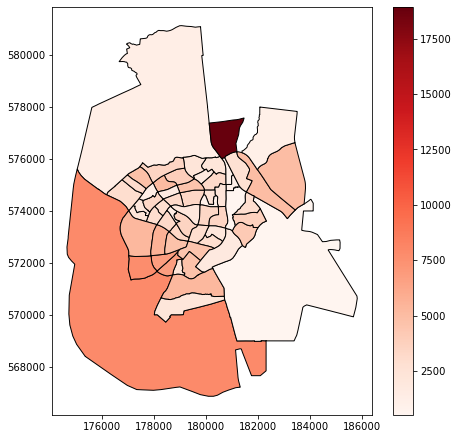

In [6]:
# population in Be'er Sheva by stat areas
stat[stat["SHEM_YISHUV"] == "באר שבע"].plot(figsize = (7.5,7.5),column="Pop_Total", edgecolor="black", cmap="Reds", legend=True)